# Clustering on car MPG data set

In [117]:
# Numerical libraries
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans



In [118]:
# reading the CSV file into pandas dataframe
mpg_df = pd.read_csv("car-mpg.csv")  

In [119]:
# Check top few records to get a feel of the data structure
mpg_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [120]:
mpg_df.describe().transpose()     # horsepower is missing

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [121]:
temp = pd.DataFrame(mpg_df.hp.str.isdigit())
temp[temp['hp'] == False]


,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [122]:
row_numbers = np.where(temp['hp'] == False)[0]
row_numbers

array([ 32, 126, 330, 336, 354, 374], dtype=int64)

In [123]:
#mpg_df.iloc[[32,126,330,336,354,374],:]
mpg_df.iloc[row_numbers,:]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [124]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [125]:
mpg_df = mpg_df.replace('?', np.nan)

In [126]:
# Drop car name columns as it is not useful 
mpg_df = mpg_df.drop('car_name', axis=1)


In [127]:
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)
mpg_df['hp'] = mpg_df['hp'].astype('float64')
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null float64
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [128]:
# check whether the data is fixed
mpg_df.iloc[row_numbers,:]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,93.5,2046,19.0,71,1
126,21.0,6,200.0,93.5,2875,17.0,74,1
330,40.9,4,85.0,93.5,1835,17.3,80,2
336,23.6,4,140.0,93.5,2905,14.3,80,1
354,34.5,4,100.0,93.5,2320,15.8,81,2
374,23.0,4,151.0,93.5,3035,20.5,82,1


In [129]:
# ORIGIN is Asia, Europe and America. 
# Lets say we want to perform clustering based on characteristics of car
# so decided to drop ORIGIN columns
mpg_df = mpg_df.drop('origin', axis=1)

# Also, lets say,  want to drop year, so that clustering is purely on 
# characyeristics of car
mpg_df = mpg_df.drop('yr', axis=1)

##  Let us do a pair plot analysis to visually check number of likely clusters

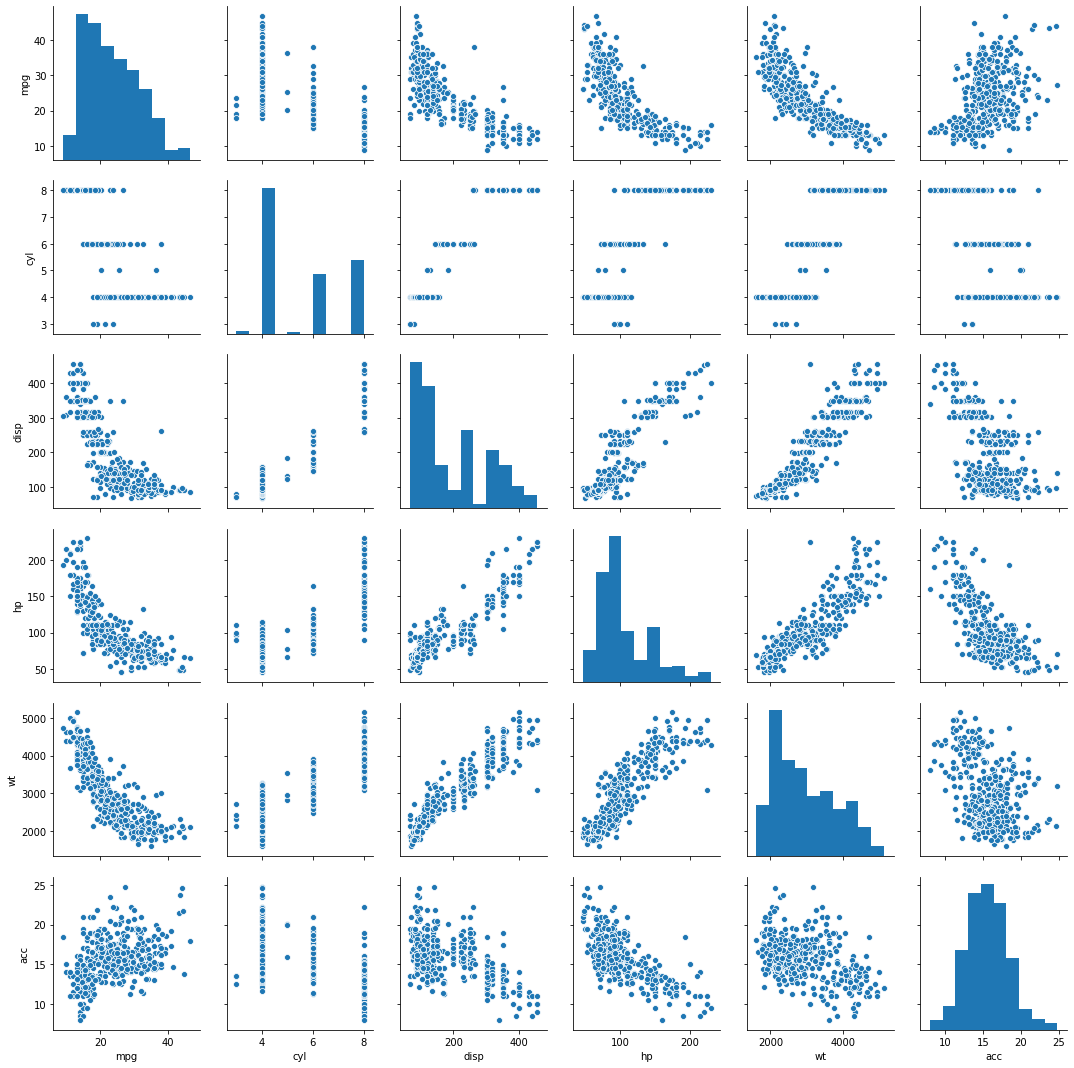

In [130]:
#
sns.pairplot(mpg_df)

In [131]:
from scipy.stats import zscore

mpg_df_z = mpg_df.apply(zscore)

# KMeans Clustering

In [132]:
cluster_range = range( 2, 8)   
cluster_inter_dist = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters)
    clusters.fit(mpg_df_z)
#    labels = clusters.labels_
#    centroids = clusters.cluster_centers_
    cluster_inter_dist.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_intertia": cluster_inter_dist } )
clusters_df

,num_clusters,cluster_intertia
0,2,944.289955
1,3,609.265388
2,4,492.519413
3,5,423.323816
4,6,366.479312
5,7,333.621533


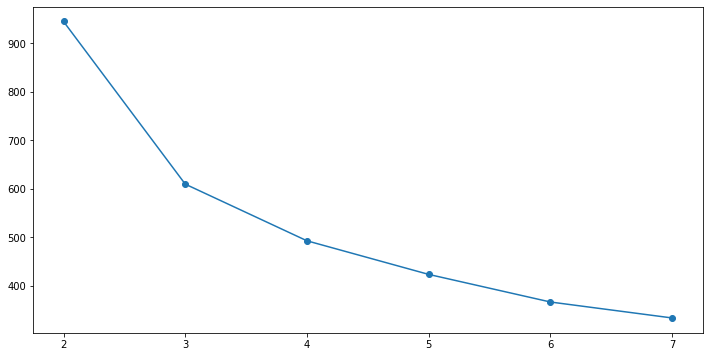

In [133]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_intertia, marker = "o" )

In [134]:
# The elbow plot indicates that there are likely 3  clusters
# Let us start with 3 clusters

In [135]:
cluster = KMeans( n_clusters = 3, random_state = 0 )
cluster.fit(mpg_df_z)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [136]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.75394661, -0.85347696, -0.80321374, -0.67506194, -0.78549879,
         0.36133415],
       [-1.15110476,  1.4860546 ,  1.48450715,  1.50624078,  1.38753374,
        -1.06267868],
       [-0.47244453,  0.34598334,  0.23689416, -0.06773972,  0.29795187,
         0.30089004]])

In [137]:
# Add column headers to centroids
centroid_df = pd.DataFrame(centroids, columns = list(mpg_df_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc
0,0.753947,-0.853477,-0.803214,-0.675062,-0.785499,0.361334
1,-1.151105,1.486055,1.484507,1.506241,1.387534,-1.062679
2,-0.472445,0.345983,0.236894,-0.067740,0.297952,0.300890


In [138]:
# Get cluster number using Predict
prediction=cluster.predict(mpg_df_z)

# Make a copy of MPG_DF (with original values, not with Z score)
# and Add 'GROUP' column indicating Cluster number

mpg_df_kmeans = mpg_df.copy()
mpg_df_kmeans["ClusterId"] = prediction     # Creating a new column "ClusterId" which will hold the cluster id of each record

In [139]:
mpg_df_kmeans.head()

,mpg,cyl,disp,hp,wt,acc,ClusterId
0,18.0,8,307.0,130.0,3504,12.0,1
1,15.0,8,350.0,165.0,3693,11.5,1
2,18.0,8,318.0,150.0,3436,11.0,1
3,16.0,8,304.0,150.0,3433,12.0,1
4,17.0,8,302.0,140.0,3449,10.5,1


In [140]:
mpg_df_kmeans["ClusterId"].value_counts()


0    207
1     97
2     94
Name: ClusterId, dtype: int64

In [141]:
# Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
# centroids and the data in the cluster into box plots.

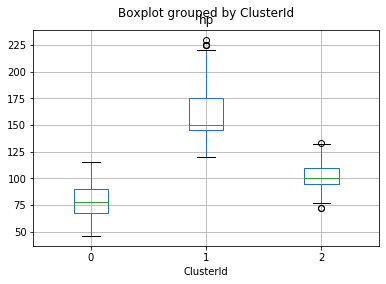

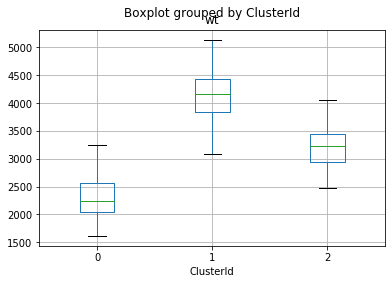

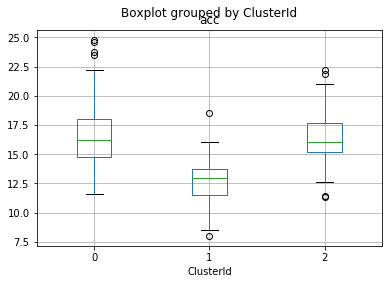

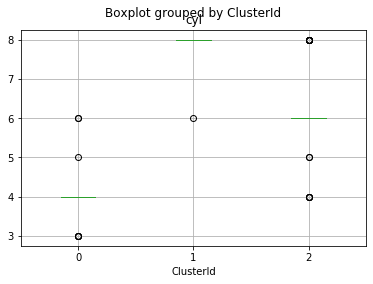

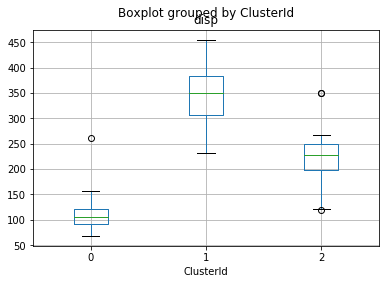

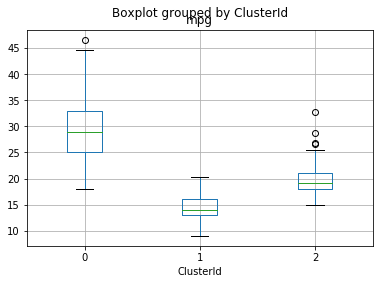

In [142]:
#import matplotlib.pylab as plt

#mpg_df_kmeans.boxplot(by = 'ClusterId',  layout=(3,3), figsize=(15, 10))

mpg_df_kmeans.boxplot('hp',by = 'ClusterId')
mpg_df_kmeans.boxplot('wt',by = 'ClusterId')
mpg_df_kmeans.boxplot('acc',by = 'ClusterId')
mpg_df_kmeans.boxplot('cyl',by = 'ClusterId')
mpg_df_kmeans.boxplot('disp',by = 'ClusterId')
mpg_df_kmeans.boxplot('mpg',by = 'ClusterId')


In [74]:
mpg_df_kmeans.to_csv('kmeans_output.csv',index=False)

# Hierarchical Clustering

In [143]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

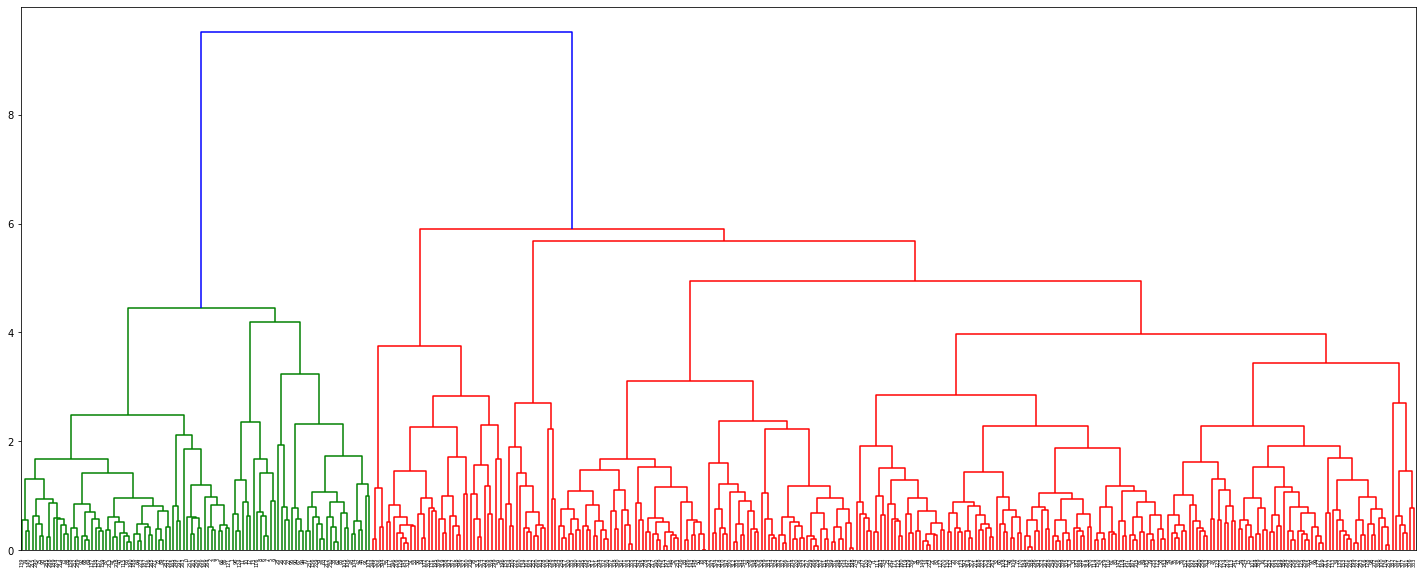

In [144]:
plt.figure(figsize=(25,10))
mergings = linkage(mpg_df_z, method = "complete")


dendrogram(mergings)
plt.show()

In [145]:
#CUT the tree into 3 clusters 
# and Get CLuster Id in ClusterCut

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))


In [146]:
#temp_df = pd.DataFrame(clusterCut)
#temp_df["ClId"].value_counts()
#temp_df[0]

In [147]:
#mpg_df_z.head()

In [148]:
# Add cluster id as column
mpg_hclust = pd.concat([mpg_df, clusterCut], axis=1)
mpg_hclust.columns = ['mpg', 'cyl','disp', 'hp', 'wt','acc', 'ClusterID']

In [149]:
mpg_hclust.head()

,mpg,cyl,disp,hp,wt,acc,ClusterID
0,18.0,8,307.0,130.0,3504,12.0,0
1,15.0,8,350.0,165.0,3693,11.5,0
2,18.0,8,318.0,150.0,3436,11.0,0
3,16.0,8,304.0,150.0,3433,12.0,0
4,17.0,8,302.0,140.0,3449,10.5,0


In [150]:
mpg_hclust["ClusterID"].value_counts()

1    260
0    100
2     38
Name: ClusterID, dtype: int64

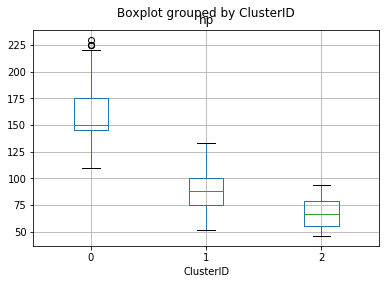

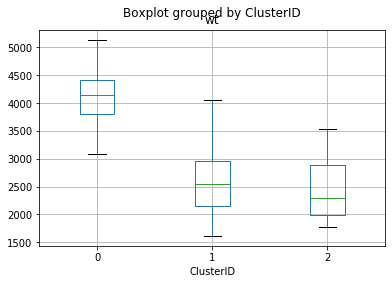

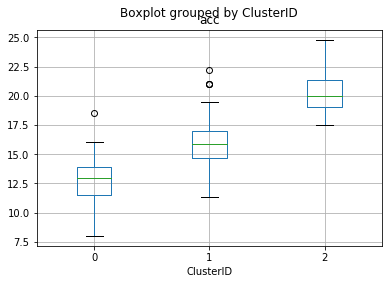

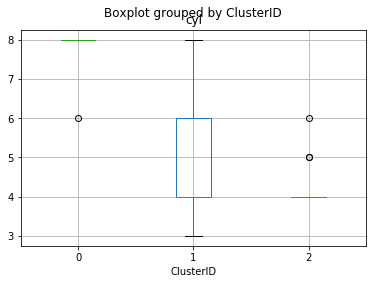

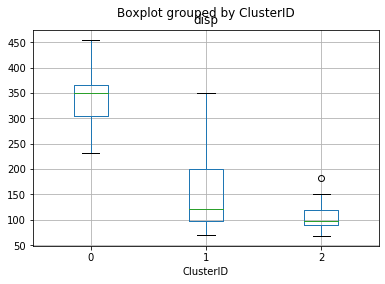

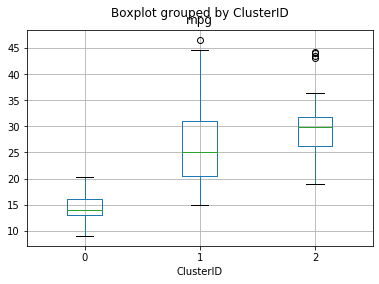

In [151]:
#mpg_hclust.boxplot(by = 'ClusterID',  layout=(2,3), figsize=(15, 10))


mpg_hclust.boxplot('hp',by = 'ClusterID')
mpg_hclust.boxplot('wt',by = 'ClusterID')
mpg_hclust.boxplot('acc',by = 'ClusterID')
mpg_hclust.boxplot('cyl',by = 'ClusterID')
mpg_hclust.boxplot('disp',by = 'ClusterID')
mpg_hclust.boxplot('mpg',by = 'ClusterID')
